# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress


# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [3]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 631


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [4]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial" 
city= "faya"

import json

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0
        

    # Create endpoint URL with each city
    city_url = url + "appid=" + weather_api_key  + "&q=" + city + "&units=" + units
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))
    
    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]['temp_max']
        city_humidity = city_weather["main"]['humidity']
        city_clouds = city_weather['clounds']["all"]
        city_wind = city_weather['wind']["speed"]
        city_country = city_weather["sys"]['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | vaini
City not found. Skipping...
Processing Record 2 of Set 1 | phulabani
City not found. Skipping...
Processing Record 3 of Set 1 | miramar
City not found. Skipping...
Processing Record 4 of Set 1 | upernavik
City not found. Skipping...
Processing Record 5 of Set 1 | saint-philippe
City not found. Skipping...
Processing Record 6 of Set 1 | vanimo
City not found. Skipping...
Processing Record 7 of Set 1 | macklin
City not found. Skipping...
Processing Record 8 of Set 1 | ondangwa
City not found. Skipping...
Processing Record 9 of Set 1 | lompoc
City not found. Skipping...
Processing Record 10 of Set 1 | rikitea
City not found. Skipping...
Processing Record 11 of Set 1 | sitka
City not found. Skipping...
Processing Record 12 of Set 1 | anadyr
City not found. Skipping...
Processing Record 13 of Set 1 | namibe
City not found. Skipping...
Processing Record 14 of Set 1 | taolanaro
City not found. Ski

City not found. Skipping...
Processing Record 20 of Set 3 | solnechnyy
City not found. Skipping...
Processing Record 21 of Set 3 | sangar
City not found. Skipping...
Processing Record 22 of Set 3 | chegdomyn
City not found. Skipping...
Processing Record 23 of Set 3 | amderma
City not found. Skipping...
Processing Record 24 of Set 3 | grindavik
City not found. Skipping...
Processing Record 25 of Set 3 | mancio lima
City not found. Skipping...
Processing Record 26 of Set 3 | marsaxlokk
City not found. Skipping...
Processing Record 27 of Set 3 | kapaa
City not found. Skipping...
Processing Record 28 of Set 3 | bosaso
City not found. Skipping...
Processing Record 29 of Set 3 | kavieng
City not found. Skipping...
Processing Record 30 of Set 3 | prince rupert
City not found. Skipping...
Processing Record 31 of Set 3 | alihe
City not found. Skipping...
Processing Record 32 of Set 3 | lebu
City not found. Skipping...
Processing Record 33 of Set 3 | tsihombe
City not found. Skipping...
Processi

City not found. Skipping...
Processing Record 39 of Set 5 | ye
City not found. Skipping...
Processing Record 40 of Set 5 | kahului
City not found. Skipping...
Processing Record 41 of Set 5 | barwaha
City not found. Skipping...
Processing Record 42 of Set 5 | nizhnekamsk
City not found. Skipping...
Processing Record 43 of Set 5 | amboasary
City not found. Skipping...
Processing Record 44 of Set 5 | poli
City not found. Skipping...
Processing Record 45 of Set 5 | provideniya
City not found. Skipping...
Processing Record 46 of Set 5 | okhotsk
City not found. Skipping...
Processing Record 47 of Set 5 | tuktoyaktuk
City not found. Skipping...
Processing Record 48 of Set 5 | eureka
City not found. Skipping...
Processing Record 49 of Set 5 | panzhihua
City not found. Skipping...
Processing Record 0 of Set 6 | haapsalu
City not found. Skipping...
Processing Record 1 of Set 6 | srednekolymsk
City not found. Skipping...
Processing Record 2 of Set 6 | maragogi
City not found. Skipping...
Processi

City not found. Skipping...
Processing Record 9 of Set 8 | vangaindrano
City not found. Skipping...
Processing Record 10 of Set 8 | henties bay
City not found. Skipping...
Processing Record 11 of Set 8 | kudahuvadhoo
City not found. Skipping...
Processing Record 12 of Set 8 | walvis bay
City not found. Skipping...
Processing Record 13 of Set 8 | alofi
City not found. Skipping...
Processing Record 14 of Set 8 | shingu
City not found. Skipping...
Processing Record 15 of Set 8 | petropavlovsk-kamchatskiy
City not found. Skipping...
Processing Record 16 of Set 8 | bethel
City not found. Skipping...
Processing Record 17 of Set 8 | qurunbaliyah
City not found. Skipping...
Processing Record 18 of Set 8 | zyryanka
City not found. Skipping...
Processing Record 19 of Set 8 | hindupur
City not found. Skipping...
Processing Record 20 of Set 8 | ulladulla
City not found. Skipping...
Processing Record 21 of Set 8 | havre-saint-pierre
City not found. Skipping...
Processing Record 22 of Set 8 | ambon


Processing Record 27 of Set 10 | kropotkin
City not found. Skipping...
Processing Record 28 of Set 10 | kuytun
City not found. Skipping...
Processing Record 29 of Set 10 | abilene
City not found. Skipping...
Processing Record 30 of Set 10 | sorong
City not found. Skipping...
Processing Record 31 of Set 10 | san andres
City not found. Skipping...
Processing Record 32 of Set 10 | cap malheureux
City not found. Skipping...
Processing Record 33 of Set 10 | umm kaddadah
City not found. Skipping...
Processing Record 34 of Set 10 | nobeoka
City not found. Skipping...
Processing Record 35 of Set 10 | scarborough
City not found. Skipping...
Processing Record 36 of Set 10 | ozernovskiy
City not found. Skipping...
Processing Record 37 of Set 10 | warqla
City not found. Skipping...
Processing Record 38 of Set 10 | port blair
City not found. Skipping...
Processing Record 39 of Set 10 | hobyo
City not found. Skipping...
Processing Record 40 of Set 10 | valleyview
City not found. Skipping...
Processi

City not found. Skipping...
Processing Record 45 of Set 12 | beroroha
City not found. Skipping...
Processing Record 46 of Set 12 | soyo
City not found. Skipping...
Processing Record 47 of Set 12 | taltal
City not found. Skipping...
Processing Record 48 of Set 12 | moron
City not found. Skipping...
Processing Record 49 of Set 12 | grand river south east
City not found. Skipping...
Processing Record 0 of Set 13 | half moon bay
City not found. Skipping...
Processing Record 1 of Set 13 | sabzevar
City not found. Skipping...
Processing Record 2 of Set 13 | manzil jamil
City not found. Skipping...
Processing Record 3 of Set 13 | zhoucun
City not found. Skipping...
Processing Record 4 of Set 13 | wajima
City not found. Skipping...
Processing Record 5 of Set 13 | vila franca do campo
City not found. Skipping...
Processing Record 6 of Set 13 | ambikapur
City not found. Skipping...
Processing Record 7 of Set 13 | callaguip
City not found. Skipping...
Processing Record 8 of Set 13 | jiazi
City no

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

Series([], dtype: int64)

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          577
Lat           577
Lng           577
Max Temp      577
Humidity      577
Cloudiness    577
Wind Speed    577
Country       577
Date          577
dtype: int64

In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities1.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,faya,18.3851,42.4509,22.06,35,21,2.60,SA,1666108228
1,farsund,58.0948,6.8047,13.30,100,0,7.65,NO,1666108228
2,new norfolk,-42.7826,147.0587,11.72,58,12,1.34,AU,1666108230
3,jamestown,42.0970,-79.2353,5.77,77,100,9.77,US,1666107934
4,lanzhou,36.0564,103.7922,14.53,48,59,1.20,CN,1666108230


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

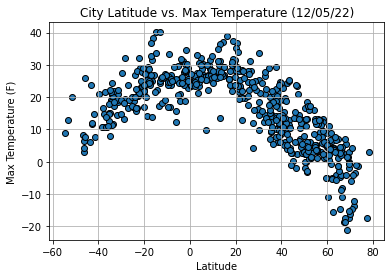

In [20]:
# Build scatter plot for latitude vs. temperature
# YOUR CODE HERE
plt.scatter(city_data_df["Lat"],
            city_data_df["Max Temp"],
            edgecolor = "black",marker="o")

# Incorporate the other graph properties
# YOUR CODE HERE
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.title("City Latitude vs. Max Temperature (%s)" % time.strftime("%x"))
plt.grid(which='major', linestyle='-')
plt.grid(which='minor', linestyle=':')

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

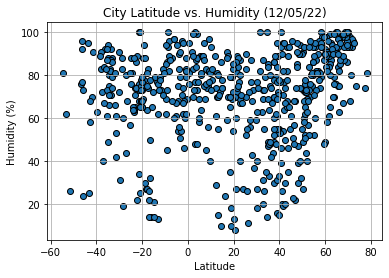

In [21]:
# Build the scatter plots for latitude vs. humidity
# YOUR CODE HERE
plt.scatter(city_data_df["Lat"], 
            city_data_df["Humidity"],
            edgecolor="black", marker="o")
# Incorporate the other graph properties
# YOUR CODE HERE
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("City Latitude vs. Humidity (%s)" % time.strftime("%x"))
plt.grid(which='major', linestyle='-')
plt.grid(which='minor', linestyle=':')

# Save the figure
plt.savefig("../output_data/Fig22.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

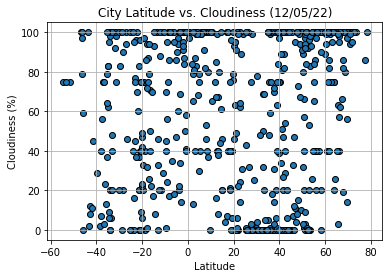

In [23]:
# Build the scatter plots for latitude vs. cloudiness
# YOUR CODE HERE
plt.scatter(city_data_df["Lat"], 
            city_data_df["Cloudiness"],
            edgecolor="black", marker="o")

# Incorporate the other graph properties
# YOUR CODE HERE
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("City Latitude vs. Cloudiness (%s)" % time.strftime("%x"))
plt.grid(which='major', linestyle='-')
plt.grid(which='minor', linestyle=':')

# Save the figure
plt.savefig("../output_data/Fig33.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

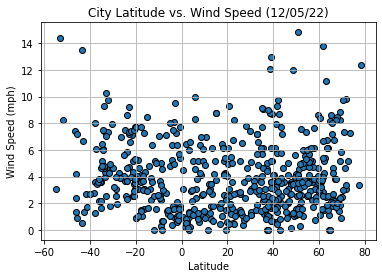

In [24]:
# Build the scatter plots for latitude vs. wind speed
# YOUR CODE HERE
plt.scatter(city_data_df["Lat"], 
            city_data_df["Wind Speed"],
            edgecolor="black", marker="o")

# Incorporate the other graph properties
# YOUR CODE HERE
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title("City Latitude vs. Wind Speed (%s)" % time.strftime("%x"))
plt.grid(which='major', linestyle='-')
plt.grid(which='minor', linestyle=':')

# Save the figure
plt.savefig("../output_data/Fig44.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots
# YOUR CODE HERE
def linear_reg_plot(x_values,y_values,xytext,filename):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,(x_values.median(),y_values.median()),fontsize=15,color="red",xytext=xytext)
    plt.xlabel("Latitude")
    print(f"The r-value is: {rvalue}")

In [27]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
# YOUR CODE HERE
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0]
# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,faya,18.3851,42.4509,22.06,35,21,2.60,SA,1666108228
1,farsund,58.0948,6.8047,13.30,100,0,7.65,NO,1666108228
3,jamestown,42.0970,-79.2353,5.77,77,100,9.77,US,1666107934
4,lanzhou,36.0564,103.7922,14.53,48,59,1.20,CN,1666108230
6,albany,42.6001,-73.9662,10.36,74,29,2.10,US,1666108231


In [28]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
# YOUR CODE HERE
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0]
# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,new norfolk,-42.7826,147.0587,11.72,58,12,1.34,AU,1666108230
5,ushuaia,-54.8000,-68.3000,8.81,81,75,3.09,AR,1666108231
7,carnarvon,-24.8667,113.6333,20.02,76,0,7.46,AU,1666108232
9,saint-pierre,-21.3393,55.4781,22.82,68,0,5.14,RE,1666108236
10,colorado,-22.8375,-51.9731,20.36,86,96,4.69,BR,1666107965


###  Temperature vs. Latitude Linear Regression Plot

In [48]:
# Linear regression on Northern Hemisphere
# YOUR CODE HERE

The r-value is: -0.8462548186825364


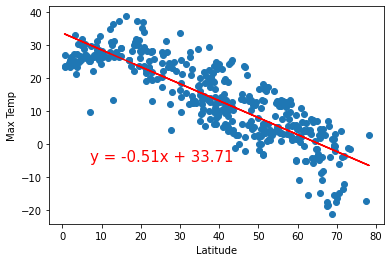

In [47]:
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
xytext=(7, -5)
#linear_reg_plot(x_values,y_values,xytext)
plt.ylabel("Max Temp")


(linear_reg_plot(x_values,y_values,xytext,"north_hemisphere Lat VS Max Temp.png"))


In [55]:
# Linear regression on Southern Hemisphere
# YOUR CODE HERE

The r-value is: 0.6419546065421801


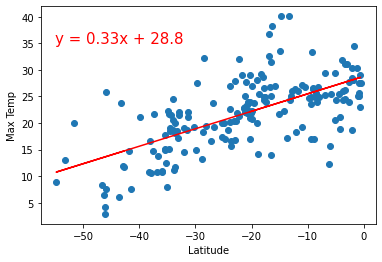

In [54]:
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
xytext=(-55, 35)
#linear_reg_plot(x_values,y_values,xytext)
plt.ylabel("Max Temp")

(linear_reg_plot(x_values,y_values,xytext,"south_hemisphere Lat VS Max Temp.png"))

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

In [57]:
# Northern Hemisphere
# YOUR CODE HERE

The r-value is: 0.2385317912939407


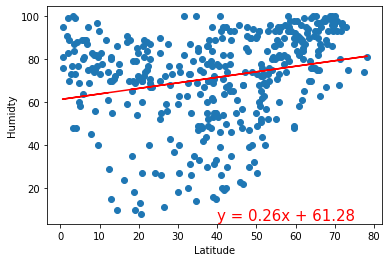

In [56]:
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
xytext=(40, 5)
#linear_reg_plot(x_values,y_values,xytext)
plt.ylabel("Humidty")

(linear_reg_plot(x_values,y_values,xytext,"north_hemisphere Lat VS Humidity.png"))

In [59]:
# Southern Hemisphere
# YOUR CODE HERE

The r-value is: 0.016759316950056818


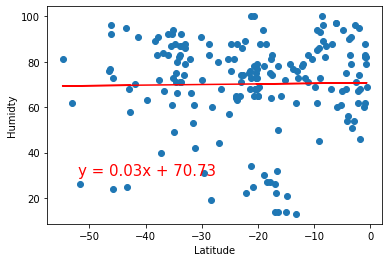

In [58]:
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
xytext=(-52, 30)
#linear_reg_plot(x_values,y_values,xytext)
plt.ylabel("Humidty")

(linear_reg_plot(x_values,y_values,xytext,"south_hemisphere Lat VS Humidity.png"))

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

In [63]:
# Northern Hemisphere
# YOUR CODE HERE

The r-value is: 0.155004893876971


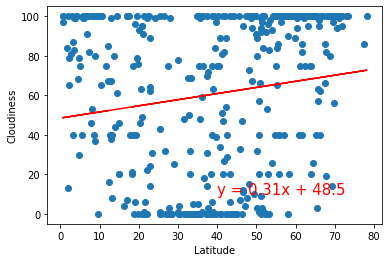

In [62]:
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
xytext=(40, 10)
#linear_reg_plot(x_values,y_values,xytext)
plt.ylabel("Cloudiness")

(linear_reg_plot(x_values,y_values,xytext,"north_hemisphere Lat VS Cloudiness.png"))

In [65]:
# Southern Hemisphere
# YOUR CODE HERE

The r-value is: 0.14341322916643243


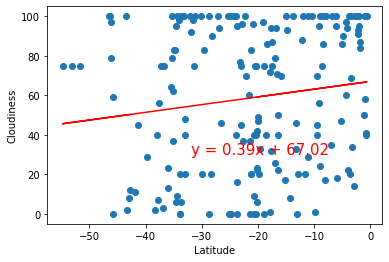

In [64]:
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
xytext=(-32, 30)
#linear_reg_plot(x_values,y_values,xytext)
plt.ylabel("Cloudiness")

(linear_reg_plot(x_values,y_values,xytext,"south_hemisphere Lat VS Cloudiness.png"))

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

In [74]:
# Northern Hemisphere
# YOUR CODE HERE

The r-value is: 0.1743466729090334


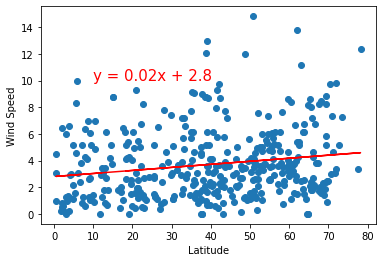

In [73]:
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
xytext=(10, 10)
#linear_reg_plot(x_values,y_values,xytext)
plt.ylabel("Wind Speed")

(linear_reg_plot(x_values,y_values,xytext,"north_hemisphere Lat VS Wind Speed .png"))

In [79]:
# Southern Hemisphere
# YOUR CODE HERE

The r-value is: -0.24947753546264592


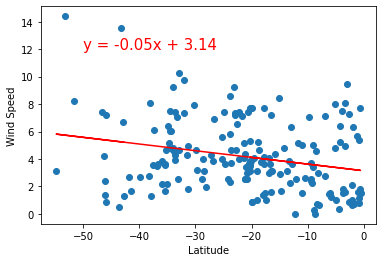

In [78]:
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
xytext=(-50, 12)
#linear_reg_plot(x_values,y_values,xytext)
plt.ylabel("Wind Speed")

(linear_reg_plot(x_values,y_values,xytext,"south_hemisphere Lat VS Wind Speed .png"))

**Discussion about the linear relationship:** YOUR RESPONSE HERE